In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
DATASET_FILE = "/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/full_results.csv"

def display_color_mesh(tbl, title, save = None):
    pcm = plt.pcolormesh(range(tbl.shape[1]), range(tbl.shape[0]), tbl, vmin=np.nanmin(tbl), vmax=np.nanmax(tbl))
    plt.yticks(ticks=range(tbl.shape[0]), labels=row_dict.keys())
    plt.xticks(ticks=range(tbl.shape[1]), labels=col_dict.keys())
    plt.xlabel('M')
    plt.ylabel('K')
    plt.title(title)
    plt.colorbar(pcm)
    if save != None:
        plt.savefig(save)
    plt.show()
    

def display_score_by_index_size(scores, index_sizes, title, ylabel, lines, save = None):
    for line in lines:
        plt.axhline(y=line[0], color=line[2], linestyle=line[3], label=line[1])

        if line[4]:
            plt.annotate(line[1], (60, line[0]), xytext=(5, 5), textcoords="offset points", ha="left", va="bottom")
            
    scores_linear = scores.flatten()
    index_sizes_linear = index_sizes.flatten()
    plt.ylim(0.02, 0.4)
    plt.scatter(index_sizes_linear, scores_linear)
    plt.xlabel('Index Size (MB)')
    plt.ylabel(ylabel)
    plt.title(title)
    if save != None:
        plt.savefig(save)
    plt.show()

In [11]:
data = pd.read_csv(DATASET_FILE)

In [12]:
data

,Unnamed: 0,Model,M,K,Training Sample Size,Training Sample Size (%),Alpha,nDCG@10,AP@1000,RR@10,Dense Index Size (MB),nDCG@10 Rounded,AP@1000 Rounded,RR@10 Rounded
0,0,BM25 + AggretrieverPQ,16,256,200000,2.27%,0,0.255531,0.216782,0.204802,169.395,0.256,0.217,0.205
1,1,BM25 + AggretrieverPQ,16,512,200000,2.27%,0,0.284636,0.236008,0.227924,187.009,0.285,0.236,0.228
2,2,BM25 + AggretrieverPQ,16,4096,200000,2.27%,0,0.296122,0.250069,0.238086,248.103,0.296,0.250,0.238
3,3,BM25 + AggretrieverPQ,16,2048,200000,2.27%,0,0.310618,0.264176,0.259459,225.238,0.311,0.264,0.259
4,4,BM25 + AggretrieverPQ,16,1024,200000,2.27%,0,0.289692,0.243629,0.235030,205.374,0.290,0.244,0.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,8,BM25 + AggretrieverPQ,8,2048,200000,2.27%,0,0.261531,0.220730,0.209712,132.484,0.262,0.221,0.210
129,9,BM25 + AggretrieverPQ,8,1024,200000,2.27%,0,0.256628,0.220084,0.208439,121.051,0.257,0.220,0.208
130,0,BM25 + TctColBertPQ,48,4096,200000,2.27%,0,0.331006,0.295352,0.284797,652.849,NaN,NaN,NaN
131,1,BM25 + AggretrieverPQ,48,4096,200000,2.27%,0,0.371426,0.316801,0.314713,652.849,NaN,NaN,NaN


# BM25 + AggretrieverPQ - Analysis

In [13]:
data_bm25_agg = data[data["Model"] == "BM25 + AggretrieverPQ"]
row_dict = {'256': 0, '512': 1, '1024': 2, '2048': 3, '4096': 4}
col_dict = {'8': 0, '16': 1, '24': 2, '32': 3, '48': 4, '64': 5, '96': 6}
ndcg_scores = np.zeros((5, 7))
rr_scores = np.zeros_like(ndcg_scores)
ap_scores = np.zeros_like(ndcg_scores)
index_sizes = np.zeros_like(ndcg_scores)

for (idx, row) in data_bm25_agg.iterrows():
    tbl_row = row_dict[str(row.K)]
    tbl_col = col_dict[str(row.M)]

    ndcg_scores[tbl_row, tbl_col] = row['nDCG@10'] if row['nDCG@10'] >= 0 else None
    rr_scores[tbl_row, tbl_col] = row['RR@10'] if row['RR@10'] >= 0 else None
    ap_scores[tbl_row, tbl_col] = row['AP@1000'] if row['AP@1000'] >= 0 else None
    index_sizes[tbl_row, tbl_col] = row['Dense Index Size (MB)'] if row['Dense Index Size (MB)'] >= 0 else None

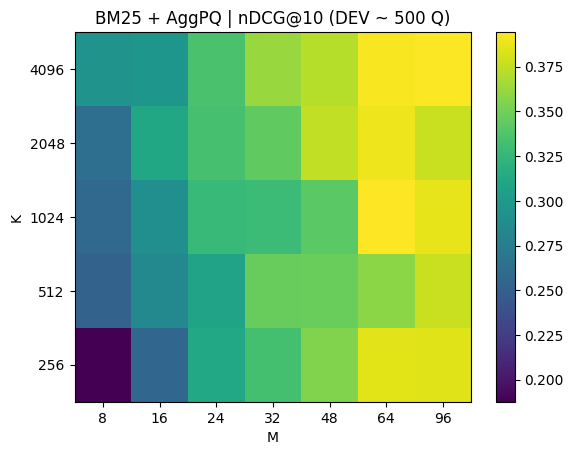

In [14]:
display_color_mesh(ndcg_scores, 'BM25 + AggPQ | nDCG@10 (DEV ~ 500 Q)', 
                   save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_aggpq_ndcg10_grid.png')

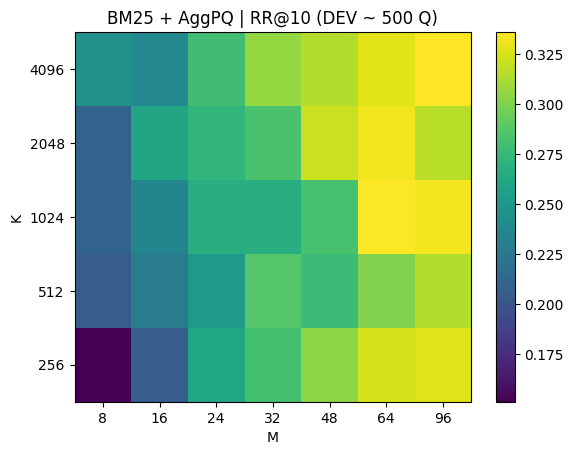

In [15]:
display_color_mesh(rr_scores, 'BM25 + AggPQ | RR@10 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_aggpq_rr10_grid.png')

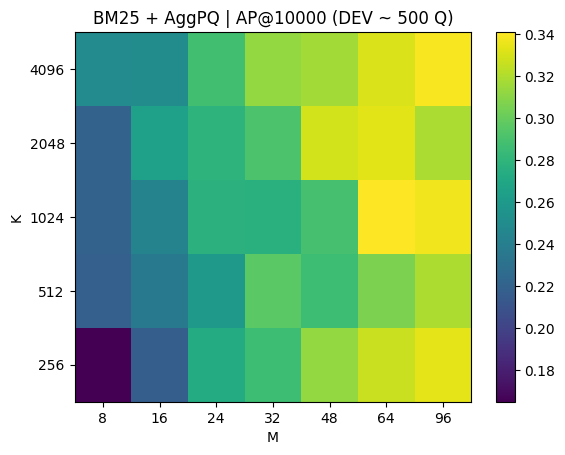

In [16]:
display_color_mesh(ap_scores, 'BM25 + AggPQ | AP@10000 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_aggpq_ap1000_grid.png')

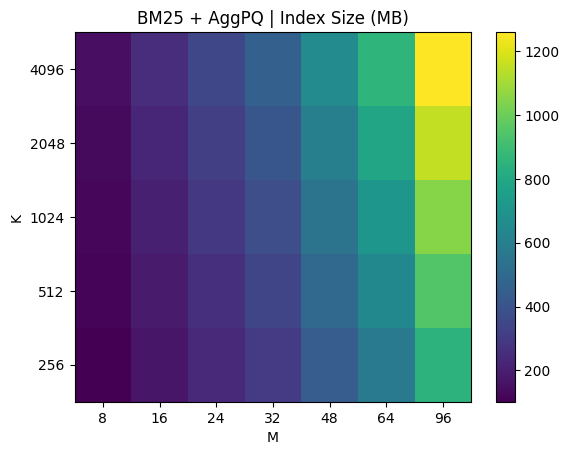

In [17]:
display_color_mesh(index_sizes, 'BM25 + AggPQ | Index Size (MB)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_aggpq_index_size_grid.png')

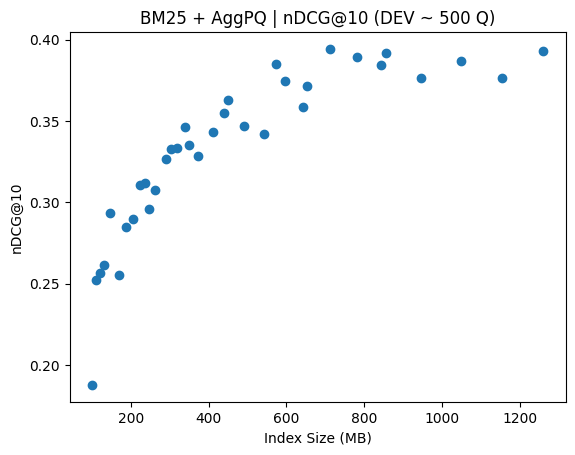

In [21]:
display_score_by_index_size(ndcg_scores, index_sizes, 'BM25 + AggPQ | nDCG@10 (DEV ~ 500 Q)', 'nDCG@10',
                            lines=[]
                            ,save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_aggpq_ndcg10_plot.png')

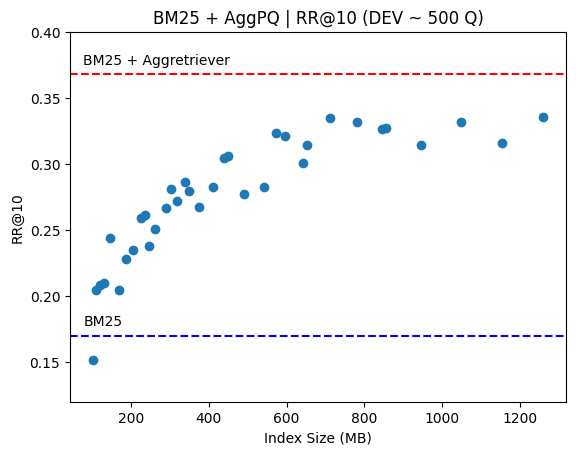

In [41]:
display_score_by_index_size(rr_scores, index_sizes, 'BM25 + AggPQ | RR@10 (DEV ~ 500 Q)', 'RR@10',
                            lines=[(0.170, 'BM25', 'blue', '--', True),
                                (0.368, 'BM25 + Aggretriever', 'red', '--', True)],
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_aggpq_rr10_plot.png')

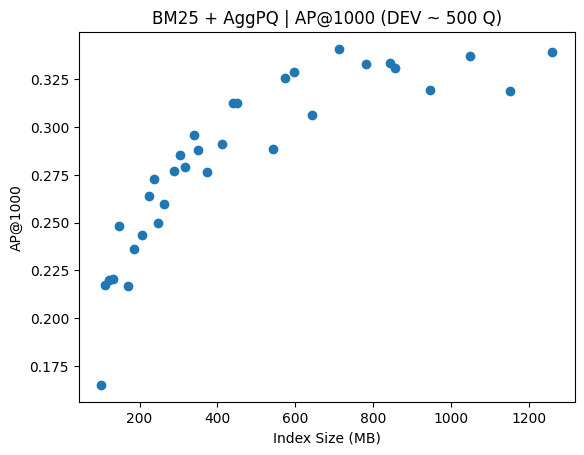

In [119]:
display_score_by_index_size(ap_scores, index_sizes, 'BM25 + AggPQ | AP@1000 (DEV ~ 500 Q)', 'AP@1000',
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_aggpq_app1000_plot.png')

# BM25 + TctColBertPQ - Analysis

In [43]:
data_bm25_tct = data[data["Model"] == "BM25 + TctColBertPQ"]
row_dict_tct = {'256': 0, '512': 1, '1024': 2, '2048': 3, '4096': 4}
col_dict_tct = {'8': 0, '16': 1, '24': 2, '32': 3, '48': 4, '64': 5, '96': 6}
ndcg_scores_tct = np.zeros((5, 7))
rr_scores_tct = np.zeros_like(ndcg_scores)
ap_scores_tct = np.zeros_like(ndcg_scores)
index_sizes_tct = np.zeros_like(ndcg_scores)


for (idx, row) in data_bm25_tct.iterrows():
    tbl_row = row_dict[str(row.K)]
    tbl_col = col_dict[str(row.M)]

    ndcg_scores_tct[tbl_row, tbl_col] = row['nDCG@10'] if row['nDCG@10'] >= 0 else None
    rr_scores_tct[tbl_row, tbl_col] = row['RR@10'] if row['RR@10'] >= 0 else None
    ap_scores_tct[tbl_row, tbl_col] = row['AP@1000'] if row['AP@1000'] >= 0 else None
    index_sizes_tct[tbl_row, tbl_col] = row['Dense Index Size (MB)'] if row['Dense Index Size (MB)'] >= 0 else None

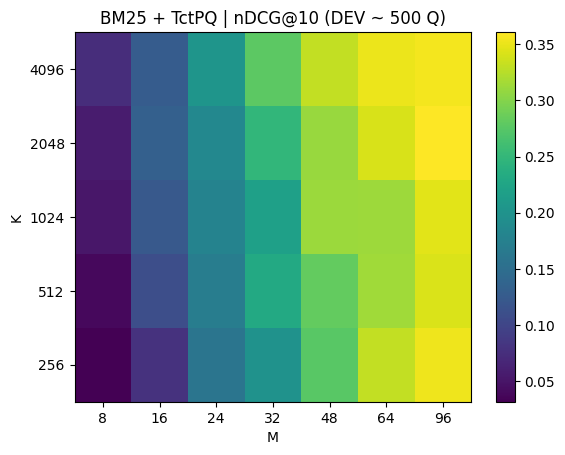

In [17]:
display_color_mesh(ndcg_scores_tct, 'BM25 + TctPQ | nDCG@10 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_tctpq_ndcg10_grid.png')

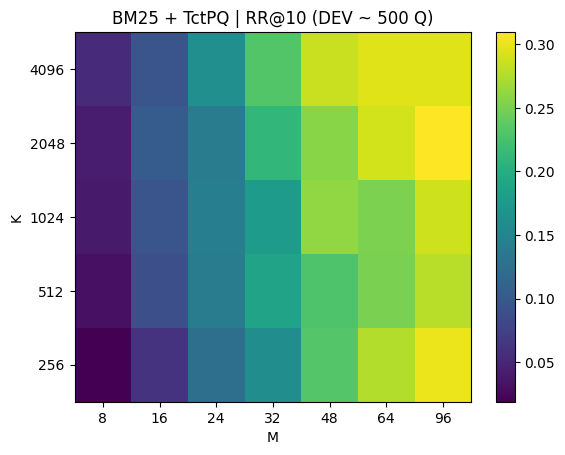

In [18]:
display_color_mesh(rr_scores_tct, 'BM25 + TctPQ | RR@10 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_tctpq_rr10_grid.png')

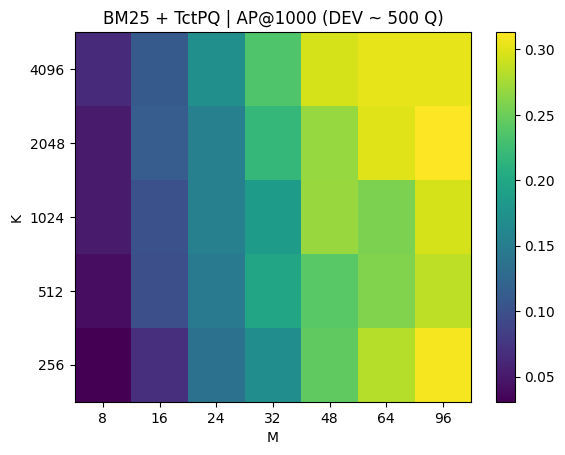

In [19]:
display_color_mesh(ap_scores_tct, 'BM25 + TctPQ | AP@1000 (DEV ~ 500 Q)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_tctpq_ap1000_grid.png')

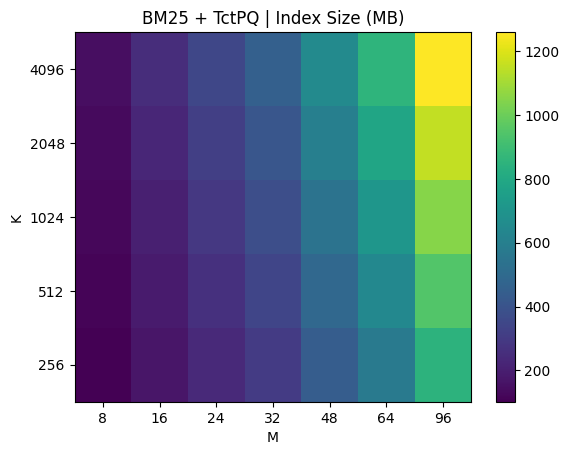

In [20]:
display_color_mesh(index_sizes_tct, 'BM25 + TctPQ | Index Size (MB)',
                  save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_tctpq_index_size_grid.png')

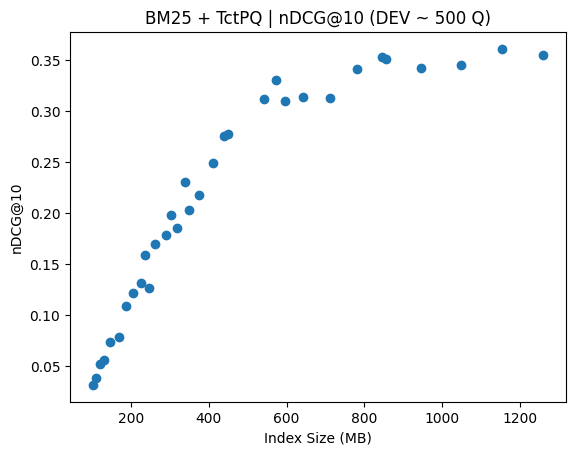

In [124]:
display_score_by_index_size(ndcg_scores_tct, index_sizes, 'BM25 + TctPQ | nDCG@10 (DEV ~ 500 Q)', 'nDCG@10',
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_tctpq_ndcg10_plot.png')

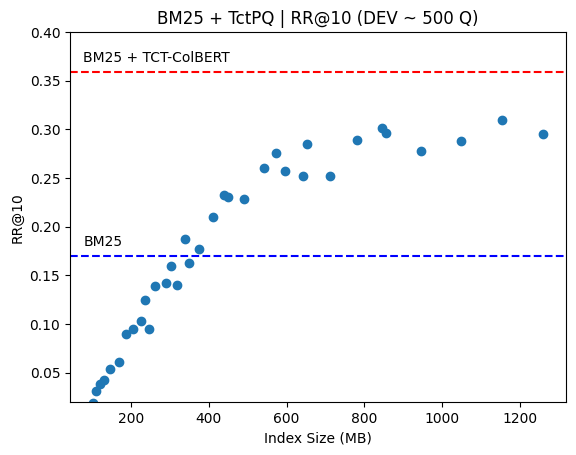

In [48]:
display_score_by_index_size(rr_scores_tct, index_sizes, 'BM25 + TctPQ | RR@10 (DEV ~ 500 Q)', 'RR@10',
                           [(0.170, 'BM25', 'blue', '--', True),
                                (0.359, 'BM25 + TCT-ColBERT', 'red', '--', True)],
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_tctpq_rr10_plot.png')

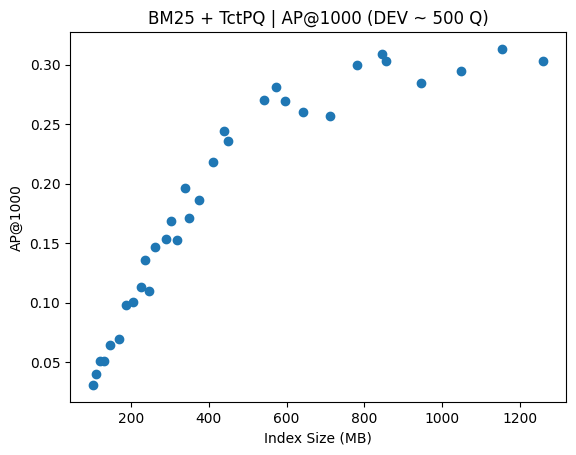

In [126]:
display_score_by_index_size(ap_scores_tct, index_sizes, 'BM25 + TctPQ | AP@1000 (DEV ~ 500 Q)', 'AP@1000',
                           save='/home/catalinlup/MyWorkspace/MasterThesis/results/gridsearch/plots/bm25_tctpq_ap1000_plot.png')